In [3]:
import os
import copy

#Manejo de matrices y tablas
import numpy as np
import pandas as pd

#Estadistica y funciones matemáticas
import scipy.stats as st
from scipy.optimize import fmin
from scipy import integrate
from scipy.stats.mstats import mquantiles
import statistics 
import pyreadr
import scipy.io as sio
from itertools import combinations
from sklearn.model_selection import train_test_split

#Probabilistic programs
import pymc3 as pm
import theano.tensor as tt #NOTA: theano va a cambiar a tensorflow en PyMC4
import theano
from theano.compile.ops import as_op
print('Running on PyMC3 v{}'.format(pm.__version__))

#Graficas
import seaborn as sns
import plotly.graph_objects as go
import altair as alt
from altair_saver import save #ademas instalar en terminal: brew cask install chromedriver
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from matplotlib import animation, rc
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, HBox, VBox, Layout
from graphviz import Source, Digraph
import dot2tex as d2t
from latex import build_pdf
from mpl_toolkits.mplot3d import axes3d
import arviz as az

#Funciones propias (tienen que estar en el mismo directorio)
import my_fun as mf

Running on PyMC3 v3.11.2


# Adaptive Toolbox

Santiago Alonso-Díaz, PhD \
Universidad Javeriana

<center><img src="img/7_CB/Gigerenzer1.png" width = "501" height = '500'></center>

Los humanos y animales siempre han dependido de heurísticas para solucionar problemas. 

Ejemplo 1: medir áreas de hendiduras en el piso. Dar una vuelta irregular a la hendidura y dejar feromonas. Dar otra vuelta irregular y estimar el área por la frecuencia que se cruzan los dos caminos.  

<center><img src="img/7_CB/faris-mohammed-unsplash.jpg" width = "301" height = '300'></center>





Ejemplo 2: agarrar objetos a alta velocidad. Mantener un ángulo óptico constante entre uno mismo y el objeto.  

<center><img src="img/7_CB/c-perret-unsplash.jpg" width = "301" height = '300'></center>


¿Por qué aparecen las heurísticas? 
* No omnisciencia (saber todas las variables)
* No omnipotencia (poder computacional infinito)
* Intractabilidad (no hay solución analítica o computable)

Las heurísticas usualmente se relacionan (erroneamente) con el accuracy-effort tradeoff:
* La segunda (o 3era, 4ta, ...) mejor alternativa 
    * no del todo, pueden ser de hecho la mejor. 
* Las usamos por nuestros limítes computacionales 
    * no siempre, incluso en problemas fáciles pueden ser útiles
* Son una alternativa menor por que no usan toda la información, tiempo, y computos 
    * no siempre, e.g. bias-variance trade-off


Las heurísticas pueden ser eficientes

Less-is-more effect:
> "More information or computation can decrease accuracy; therefore, minds rely on simple heuristics in order to be more accurate than strategies that use more information and time." Gigerenzer & Brighton, 2009, pp 110

Veamos algunos casos de less-is-more

<center><div> Tallying</div></center>

### Problema: 

Predecir outcome Y (e.g. oprimir o no oprimir) con atributos X ($X_1, X_2, ... , X_n$)

### Solución: 

Regresión logística (p>0.5 categoria 1, p<0.5 categoria 1):

$$ Y = \beta_0 + \beta X $$


$$ Y = \beta_0 + \beta X $$

¿Cómo obtener $\beta_0$ y $\beta$?

* Maximum likelihood (MLE)
* Aleatorios
* Rankeados por validez (conocimiento del área)
* Todos igual (tallying)

¿Cuál es una solución heurística? Todas menos MLE.

Centremonos en tallying. 

¿Por qué se llama tallying/conteo? Un ejemplo: Y es comprar o no comprar torta de chocolate

$Y_i = 1 + 1*animo + 1*precio_{torta} + 1*colesterol_{torta} + 1*azucar_{torta} + 1*hora_{día}$

Cuando todo tiene el mismo peso (1), la probabilidad crece a medida que aumenta la suma. Es decir, es como contar (tally) las características disponibles.

Hay una versión simple de tallying: take-the-best de diferentes atributos (cues)

A la pregunta cuál tiene más colesterol la persona responde con el mejor cue, es decir, el que considera más relevante y conoce (e.g. calorias en la información nutricional) <br><br>


<center><img src="img/7_CB/Gigerenzer2.svg" width = "501" height = '500'></center>

Czerlinski, Gigerenzer, & Goldstein (1999) pusieron a prueba tallying, take-the-best, y regresión múltiple en veinte dominios. Trataron de predecir los siguientes outcomes:

* Deserción escolar
* Habitante de la calle
* Mortalidad
* Tamaño de ciudad
* Atractivo (hombres)
* Atractivo (mujeres)
* Precio de vivienda
* Renta de la tierra
* Salarios de profesores
* Accidentes de carros
* Consumo de gasolina
* Obesidad a los 18
* Grasa corporal
* Fertilidad de peces
* Tiempo de sueño mamifero
* Calidad de abono de vaca
* Biodiversidad
* Cantidad de lluvia
* Cantidad de oxidantes en Los Angeles
* Cantidad de ozono en San Francisco




Regresión ajusta mejor los datos. Tallying y take-the-best son mejores prediciendo. <br><br><br>

<center><img src="img/7_CB/Gigerenzer3.svg" width = "501" height = '500'></center>

En otro estudio se probaron algunos algoritmos de machine learning en una tarea de adivinar la población de una ciudad. De nuevo, take-the-best le iba bien con muestras pequeñas. <br><br> <br>

<center><img src="img/7_CB/Gigerenzer4.svg" width = "700" height = '700'></center>

Tallying o take-the-best no optimizan nada, son heurísticas. Take-the-best forma parte de un grupo de heurísticas donde less-is-more (less information, more accuracy). Cuestionan la noción que siempre hay un accuracy-effort tradeoff (effort = usar toda la info).

> "Why should a mind waste time and effort in estimating the optimal weights of cues if they do not matter or
even detract from performance?" Gigerenzer & Brighton, 2009, pp. 112

Tres elementos de take-the-best
1. Regla de busqueda: Buscar cues (e.g. grasas saturadas, calorias, proteina, sodio) en orden de validez relativo al outcome (e.g. colesterol).
2. Regla para parar: Cuando se encuentre el primer cue que discrimine entre objetos (e.g. calorias cake vs calorias pie)
3. Regla para decidir: El que tenga el mejor valor en el cue donde se paró.

<center>Ecological rationality</center>

<br>

<center>¿Cuando sirven las heurísticas? Para adaptarse. Para enfrentarse al tradeoff entre sesgo-varianza </center>


¿Qué es el tradeoff sesgo-varianza? Es un resultado de inferencia estadística <br> <br>

<center><img src="img/7_CB/bias-and-variance2.jpg" width = "400" height = '400'></center>

$$ Prediction \ error = bias^2 + variance + noise$$

En esta formula (y gráfica), a un nivel de error de predicción deseado, si bajo el sesgo (distancia del modelo a datos recolectados) necesito subir la varianza (distancia del modelo a un nuevo dato) para mantener el error de predicción deseado.



Ejemplo: predecir el clima por el día del año. Un modelo complejo (grado 12) ajusta más puntos (bajo sesgo; gráfica izq.). Sin embargo, unir puntos de un año no asegura que se pueda predecir que pasa un día de otro año (alta varianza; gráfica der.) <br><br>

<center><img src="img/7_CB/Gigerenzer5.svg" width = "900" height = '900'></center>

¿Y qué tiene que ver eso con heurísticas?

En general, tener alta varianza y bajo sesgo (overfit) puede ser poco adaptativo. Para Gigerenzer & Brighton, un organismo debería apuntar a bajar varianza i.e. mejorar predicción con nuevos datos. Las heurísticas parecen ser buenas para eso. <br> <br>

<center><img src="img/7_CB/Gigerenzer3.svg" width = "401" height = '400'></center>

La presencia de heurísticas va a depender de la estructura del ambiente

* No compensatorio (e.g. los cues no se correlacionan y su relación con el outcome difiere)
* Compensatorio (e.g. los cues están muy correlacionados con el outcome pera hay algunos mejores)

> "Why should experts and laypeople rely on heuristics? To summarize, the answer is not simply in the accuracy effort dilemma but in the bias–variance dilemma, as higher accuracy can be achieved by more or less effort." Gigerenzer & Brighton, 2009, pp 125

### Algunas heurísticas
| Heuristic             |                                                                     Description                                                                     |
|-----------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------:|
| Recognition           |                          If one of two alternatives is recognized, infer that it has the higher <br>value on the criterion.                         |
| Fluency               |              If both alternatives are recognized but one is recognized faster, <br>infer that it has the higher value on the criterion.             |
| Take-the-best         | (a) search through cues in order of validity, (b) stop search<br>as soon as a cue discriminates, and (c) choose the alternative<br>this cue favors. |
| Tallying              |                                        Do not estimate weights but simply count the number of positive cues.                                        |
| Satisficing           |                             Search through alternatives and choose the first one that exceeds your <br>aspiration level.                            |
| 1/N                   |                                                Allocate resources equally to each of N alternatives.                                                |
| Default               |                                                          If there is a default, do nothing.                                                         |
| Tit-for-tat           |                                            Cooperate first and then imitate your partner’s last behavior.                                           |
| Imitate the majority  |                                                                Imitate the majority.                                                                |
| Imitate the succesful |                                                        Imitate the most succesful individual.                                                       |


Gigerenzer & Brighton, 2009

# Modelos bayesianos para heurísticas

## Take-the-best


¿Cuál ciudad tiene más habitantes? 

<center> Lima vs Buenos Aires </center>

Proceso take-the-best:
1) Ordenar los cues por importancia \
2) Parar en el cue que discrimine \
3) Escoger el objeto con el mejor valor en el cue de 2 


|   Memory of  | Country Population | Capital |     GDP    | World cup wins |
|:------------:|:------------------:|:-------:|:----------:|:--------------:|
|     Lima     |     ¯\\\_(ツ)_/¯     |   Yes   | ¯\\\_(ツ)_/¯ |       No       |
| Buenos Aires |     ¯\\\_(ツ)_/¯     |   Yes   | ¯\\\_(ツ)_/¯ |       Yes      |

Take-the-best: Buenos Aires por World cup wins.

$$ t_q = \text{TTB}_{s}(\mathbf a_q,\mathbf b_q)$$
$$ \gamma \sim \text{Uniform}(0.5,1)$$  
$$ y_{iq} \sim
\begin{cases}
\text{Bernoulli}(\gamma) & \text{if $t_q = a$} \\
\text{Bernoulli}(1- \gamma) & \text{if $t_q = b$} \\
\text{Bernoulli}(0.5) & \text{otherwise}
\end{cases}  $$

$t_q$: decisión take-the-best (a o b) (deterministica) \
$a_q, \ b_q$: vector de cues para opción a y b (observable) \
$s$: orden de los cues por validez (observable) \
$\gamma$: probabilidad de tomar la decisión take-the-best (i.e. $a_q$) (inferido, $\ge$ 0.5 pues no se decide lo peor)\
$y_{iq}$: decisión del individuo i a la pregunta q (observable) 


### Ejercicio en clase

Haga el diagrama que represente las formulas. Está abajo, no lo vea. Luego de hacer el suyo comparelos. ¿Son iguales o qué falto/mejoró?

<center><img src="img/7_CB/model_TTB.svg" width = "51" height = '50'></center>

El experimento y data a modelar es de Ben Newell (la versión de Wagenmakers):
* 20 sujetos
* Cada sujeto contesto las mismas 30 preguntas
* Las preguntas eran de varios temas y se escogía entre dos opciones.
* Por ejemplo ¿qué ciudad de estas dos tiene más habitantes?
* En cada pregunta, el sujeto podía buscar entre 9 cues por orden de validez para ver si las opciones los tenían.
* Algo así:

<center><img src="img/7_CB/TTB_experiment.svg" width = "550" height = '550'></center>

* Otro ejemplo:

<center><img src="img/7_CB/TTB_experiment2.svg" width = "551" height = '550'></center>

In [ ]:
#Load data
m = np.array(pd.read_csv('data/7_CB/m.csv').iloc[:,1:]) #design matrix; rows: stimuli (e.g. Berlin); columns: cues (1 in the stimuli, 0 not)
p = np.array(pd.read_csv('data/7_CB/p.csv').iloc[:,1:]) #pairs of stimulus index; rows: questions. columns: stimuli index as numbered in the rows of matrix m 
y = np.array(pd.read_csv('data/7_CB/y.csv').iloc[:,1:]) #choices: rows subjects, columns questions; 0, b_q is chosen, 1 a_q is chosen
n = np.shape(m)[0]  # number of stimuli
nc = pd.read_csv('data/7_CB/nc.csv')['nc'][0] #number of cues
nq = pd.read_csv('data/7_CB/nq.csv')['nq'][0] #number of questions
ns = pd.read_csv('data/7_CB/ns.csv')['ns'][0] #number of subjects
v = np.array( pd.read_csv('data/7_CB/v.csv')['v']) #cue validity
x = np.array(pd.read_csv('data/7_CB/x.csv')['x']) #for WADD evidence provided by each cue, defined as the log-odds of their validity i.e x = log (v/(1-v)). The first one is 100 to avoid Inf


In [ ]:
#More data/observables
s = np.argsort(v)  # cue validity (rank-order; high rank high validity)
t = [] #take the best decision
# TTB Model For Each Question
for q in range(nq): #questions
    # Add Cue Contributions To Mimic TTB Decision
    tmp1 = np.zeros(nc)
    for j in range(nc): #cues
        # the -1 because it was data from r (i.e. index in python start at 0)
        # 2 to the validity to enhance cue differences. In words of Lee & Wagenmakers:
        # "applying non- compensatory weights (the pow(2,s[j])) so that 
        # the first discriminating cue determines the decision". 
        # The power 2 is the math trick that implements take the best (it could be other base > 2).
        tmp1[j] = (m[p[q, 0] - 1, j] - m[p[q, 1] - 1, j]) * np.power(2, s[j]) 
        
    # Find if Cues Favor First (sum>0), Second (sum<0), or Neither Stimulus (sum = 0)
    tmp2 = np.sum(tmp1)
    tmp3 = -1 * np.float32(-tmp2 > 0) + np.float32(tmp2 > 0) #-1 second stimulus (b_q) is better, 0 neither, 1 first stimulus (a_q) is better 
    t.append(tmp3 + 1) #it can be 0 (b_q), 1 (neither), or 2 (a_q) ... index for the yiq distribution (see pymc model)

t = np.asarray(t, dtype=int) 
#all are 2 i.e. first stimulus (a_q) is always take-the-best 
#i.e. gamma is the prob. of take the best (see gammat in pymc model1)
#in Lee & Wagenmakers words: "In the presentation of results, but not the presentation to 
#subjects in the experiment, the stimulus pairs are coded so that choice “a” always 
#corresponds to the TTB choice"
tmat = np.tile(t[np.newaxis, :], (ns, 1))

### Ejercicio en clase

Traduzca el modelo gráfico a PyMC3. Está abajo, no lo vea. Luego de hacer el suyo comparelos. ¿Son iguales o qué falto/mejoró?

<center><img src="img/7_CB/model_TTB.svg" width = "55" height = '55'></center>

In [ ]:
# Modelos basados en https://github.com/junpenglao/Bayesian-Cognitive-Modeling-in-Pymc3
with pm.Model() as model1:
    gamma = pm.Uniform("gamma", lower=0.5, upper=1)
    gammat = tt.stack([1 - gamma, 0.5, gamma])

    yiq = pm.Bernoulli("yiq", p=gammat[tmat], observed=y)
    trace1 = pm.sample()
    ppc = pm.sample_posterior_predictive(trace1, samples=5000)
    data = az.from_pymc3(trace=trace1)

az.plot_trace(data, var_names=["gamma"]);

In [ ]:
gamma = trace1["gamma"]
fig, axes = plt.subplots(1, 1, figsize=(15, 4))
my_pdf1 = st.kde.gaussian_kde(gamma)
x1 = np.linspace(0.68, 0.82, 200)
axes.plot(x1, my_pdf1(x1), "k", lw=2.5, alpha=0.6)  # distribution function
axes.set_xlim((0.66, 0.84))
axes.set_xlabel(r"$\gamma$ (probability of choosing TTB)", fontsize=15)
axes.set_ylabel("Posterior Density", fontsize=12);

$\gamma$ no es 1. Es decir, las personas no siempre escogen la take-the-best pero si con alta probabilidad (el MAP es alrededor de 0.75).

In [ ]:
az.style.use("arviz-darkgrid")
yiqpred = np.asarray(ppc["yiq"])
fig = plt.figure(figsize=(16, 8))
x1 = np.repeat(np.arange(ns) + 1, nq).reshape(ns, -1).flatten()
y1 = np.repeat(np.arange(nq) + 1, ns).reshape(nq, -1).T.flatten()

plt.scatter(y1, x1, s=np.mean(yiqpred, axis=0) * 200, c="w") #size s of the dot is the probability of picking the best
plt.scatter(y1[y.flatten() == 1], x1[y.flatten() == 1], marker="x", c="r") #x where subjs picked the best
plt.plot(np.ones(100) * 24.5, np.linspace(0, 21, 100), "--", lw=1.5, c="k")
plt.axis([0, 31, 0, 21]);
plt.ylabel('Subjects')
plt.xlabel('Question');


La grilla esta completa con x rojas en un 75% aproximadamente (el sujeto escogió la take-the-best). El modelo predice en cada pregunta esa probabilidad: el tamaño de los circulos es el promedio del posterior predictive check y son casi constantes (también ver la posterior gamma).

La línea punteada es para resaltar que algunos sujetos (x rojas) no se fueron por TTB en la preguntas finales.

Depronto usaron TTB y otra estrategia como sumar la evidencia de todos los cues, no solo parar en el mejor.



# Latent-mixture model of take-the-best and WADD

Modelo aditivo ponderado (Weighted ADDitive (WADD) model). El WADD, suma la evidencia en todos los cues para ambas alternativas, y escoge la de mayor evidencia.

$$ \phi \sim \text{Uniform}(0,1)$$
$$ z_i \sim \text{Bernoulli}(\phi)$$
$$ \gamma \sim \text{Uniform}(0.5,1)$$  
$$ t_{iq} = 
\begin{cases}
\text{TTB}_s\,(\mathbf a_q,\mathbf b_q) & \text{if $z_i = 1$} \\
\text{WADD}\,(\mathbf a_q,\mathbf b_q) & \text{if $z_i = 0$} \\
\end{cases}  $$  

$$ y_{iq} \sim
\begin{cases}
\text{Bernoulli}(\gamma) & \text{if $t_{iq} = a$} \\
\text{Bernoulli}(1- \gamma) & \text{if $t_{iq} = b$} \\
\text{Bernoulli}(0.5) & \text{otherwise}
\end{cases}  $$


### Ejercicio en clase

Haga el diagrama que represente las formulas. Está abajo, no lo vea. Luego de hacer el suyo comparelos. ¿Son iguales o qué falto/mejoró?

<center><img src="img/7_CB/model_TTB_WADD.svg" width = "60" height = '60'></center>

In [ ]:
# Question cue contributions template
qcc = np.zeros((nq, nc))
for q in range(nq):
    # Add Cue Contributions To Mimic TTB Decision
    for j in range(nc):
        qcc[q, j] = m[p[q, 0] - 1, j] - m[p[q, 1] - 1, j]

qccmat = np.tile(qcc[np.newaxis, :, :], (ns, 1, 1))
# TTB Model For Each Question
s = np.argsort(v)  # s[1:nc] <- rank(v[1:nc])
smat = np.tile(s[np.newaxis, :], (ns, nq, 1)) #mat is for matrix
ttmp = np.sum(qccmat * np.power(2, smat), axis=2) 
tmat = -1 * (-ttmp > 0) + (ttmp > 0) + 1 #0 (b_q), 1 (neither), or 2 (a_q) ... index for the yiq distribution (see pymc model)
t = tmat[0]

# WADD Model For Each Question 
# We no longer use non-compensatory weights (np.power(2, smat))
xmat = np.tile(x[np.newaxis, :], (ns, nq, 1)) #mat is for matrix
wtmp = np.sum(qccmat * xmat, axis=2)
wmat = -1 * (-wtmp > 0) + (wtmp > 0) + 1 #0 (b_q), 1 (neither), or 2 (a_q) ... index for the yiq distribution (see pymc model)
w = wmat[0]

#"In the presentation of results, but not the presentation to 
#subjects in the experiment, the stimulus pairs are coded so that choice “a” always 
#corresponds to the TTB choice"
t, w #Note that WADD manages to pick in the last six questions the worst option (b_q)

### Ejercicio en clase

Traduzca el modelo gráfico a PyMC3. Está abajo, no lo vea. Luego de hacer el suyo comparelos. ¿Son iguales o qué falto/mejoró?  

In [ ]:
with pm.Model() as model2:
    phi = pm.Beta("phi", alpha=1, beta=1, testval=0.01)

    zi = pm.Bernoulli(
        "zi",
        p=phi,
        shape=ns,
        testval=np.asarray(
            [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        ),
    )
    zi_ = tt.reshape(tt.repeat(zi, nq), (ns, nq))

    gamma = pm.Uniform("gamma", lower=0.5, upper=1)
    gammat = tt.stack([1 - gamma, 0.5, gamma])

    t2 = tt.switch(tt.eq(zi_, 1), tmat, wmat)
    yiq = pm.Bernoulli("yiq", p=gammat[t2], observed=y)

    trace2 = pm.sample()
    ppc2 = pm.sample_posterior_predictive(trace2, samples=5000)
    data2 = az.from_pymc3(trace=trace2)

az.plot_trace(data2, compact=True);

In [ ]:
fig = plt.figure(figsize=(16, 4))
zitrc = trace2["zi"]
plt.bar(np.arange(ns) + 1, 1 - np.mean(zitrc, axis=0))
plt.yticks([0, 1], ("TTB", "WADD"))
plt.xlabel("Subject")
plt.ylabel("Group")
plt.axis([0, 21, 0, 1]);

In [ ]:
az.style.use("arviz-darkgrid")
yiqpred = np.asarray(ppc2["yiq"])
fig = plt.figure(figsize=(16, 8))
x1 = np.repeat(np.arange(ns) + 1, nq).reshape(ns, -1).flatten()
y1 = np.repeat(np.arange(nq) + 1, ns).reshape(nq, -1).T.flatten()

plt.scatter(y1, x1, s=np.mean(yiqpred, axis=0) * 200, c="w") #size s of the dot is the probability of picking the best
plt.scatter(y1[y.flatten() == 1], x1[y.flatten() == 1], marker="x", c="r") #x where subjs picked the best
plt.plot(np.ones(100) * 24.5, np.linspace(0, 21, 100), "--", lw=1.5, c="k")
plt.axis([0, 31, 0, 21]);
plt.ylabel('Subjects')
plt.xlabel('Question');

### Ejercicio

1) Comparé la grilla TTB con la que acabamos de hacer TTB + WADD. Comente cuál es la principal diferencia para las seis preguntas finales. Tip: salve ambas figuras y pongalas juntas.

2) Comparé el modelo que acabamos de correr con uno donde $\phi = 0$. Es decir, un modelo nulo con otro donde incluimos $\phi$ ¿Cuál es mejor? Use criterios de información o factores de Bayes. 


# Ordenes de cues diferentes

¿Es valido el supuesto que todos usan el mismo orden de los 9 cues? ¿O diferentes individuos usan diferentes ordenes? Pongamos un prior a validez de los cues por individuo $v_{ic}$

$$ v_{ic} \sim Normal(0,0.001)$$
$$ s_i = rank \ order(v_{iq})$$
$$ t_{iq} = \text{TTB}_{si}(\mathbf a_q,\mathbf b_q)$$
$$ \gamma \sim \text{Uniform}(0.5,1)$$  
$$ y_{iq} \sim
\begin{cases}
\text{Bernoulli}(\gamma) & \text{if $t_{iq} = a$} \\
\text{Bernoulli}(1- \gamma) & \text{if $t_{iq} = b$} \\
\text{Bernoulli}(0.5) & \text{otherwise}
\end{cases}  $$

<center><img src="img/7_CB/model_TTB_order.svg" width = "600" height = '600'></center>

In [ ]:
nq = int(nq)
with pm.Model() as model3:
    gamma = pm.Uniform("gamma", lower=0.5, upper=1)
    gammat = tt.stack([1 - gamma, 0.5, gamma])

    v1 = pm.HalfNormal("vic", sd=1, shape=ns * nc)
    s1 = pm.Deterministic("si", tt.argsort(v1.reshape((ns, 1, nc)), axis=2))
    smat2 = tt.tile(s1, (1, nq, 1))  # s[1:nc] <- rank(v[1:nc])

    # TTB Model For Each Question
    ttmp = tt.sum(qccmat * tt.power(2, smat2), axis=2)
    tmat = -1 * (-ttmp > 0) + (ttmp > 0) + 1

    yiq = pm.Bernoulli("yiq", p=gammat[tmat], observed=y)
    
    #Junpeng Lao uses metropolis because the model geometry seems to be unsmooth ()
    trace3 = pm.sample(100000, step=pm.Metropolis(), compute_convergence_checks=False)
    ppc3 = pm.sample_posterior_predictive(trace3, samples=5000)
    data3 = az.from_pymc3(trace=trace3)

az.plot_trace(data3, var_names=["gamma", "vic"], compact=True);

In [ ]:
burnin = 50_000
# v1trace = np.squeeze(trace3['v1'][burnin:])
# s1trace = np.argsort(v1trace, axis=2)
s1trace = np.squeeze(trace3[burnin:]["si"]) #sampled orders

for subj_id in [12, 13]:
    subj_s = np.squeeze(s1trace[:, subj_id - 1, :]) #sampled orders for subject
    unique_ord = np.vstack(list({tuple(row) for row in subj_s})) #detects unique orders (a set does not repeat values)
    num_display = 10
    print("Subject %s" % (subj_id))
    print(
        "There are %s search orders sampled in the posterior." % (unique_ord.shape[0])
    )

    mass_ = []
    for s_ in unique_ord:
        mass_.append(np.mean(np.sum(subj_s == s_, axis=1) == len(s_)))
    mass_ = np.asarray(mass_)
    sortmass = np.argsort(mass_)[::-1]

    for i in sortmass[:num_display]:
        s_ = unique_ord[i]
        print("Order=(" + str(s_ + 1) + "), Estimated Mass=" + str(mass_[i]))

In [ ]:
[trace3[burnin:]["si"].shape, s1trace.shape]
subj_id = 12
[s1trace[:, subj_id - 1, :].shape, np.squeeze(s1trace[:, subj_id - 1, :]).shape]
unique_ord.shape



a = [[1,2], [1,3], [1,2]]
d = list({tuple(row) for row in a})
d = {tuple(row) for row in a}
np.vstack(d)
#np.array(d)
len(s_)
s_ = unique_ord[0]
print(s_.shape)
np.sum(subj_s == s_, axis=1).shape
subj_s.shape

The return order is not at all similar to the result in JAGS (as shown in the book on p.233)

In general, order seems to be hard to obtain. There may be an specification problem (e.g. different orders work)

### Ejercicio en clase

* Haga el diagrama de un modelo que combine TTB + WADD y diferentes ordenes. Esta en el libro de Lee & Wagenmakers luego de hacer el suyo comparelos. ¿Son iguales o qué falto/mejoró? 

Is less information truly better? Not so fast: a bayesian argument
<center><img src="img/7_CB/Parpart1.png" width = "700" height = '700'></center>


Regression: uses all cues \
Tallying/TTB: searches cues based on their criterion validity (obtained by experience); disregards covariance between cues (e.g. correlations between goals and league position)

<center><img src="img/7_CB/Parpart2.png" width = "700" height = '700'></center>

Un argumento clave en la teoría de heurísticas es *less-is-more*: 

> “There is a point where too much information and too much information processing can hurt” Gigerenzer and Todd (1999) (p. 21)

Para confirmar, Paula Parpart y colegas proponen hacer una comparación entre regresión y heurísticas tipo tallying en un marco probabílisitico

$$ Respuesta = \beta_1  Cue_1 + \beta_2 Cue_2 + ... + \beta_k Cue_k  $$

La respuesta a la pregunta (e.g. ¿cuál casa es más cara?) es una suma ponderada de los valores de los cues (>0 resp. A; <0 resp. B). 

Una regresión tradicional busca los mejores $\beta$ mientras que tallying tradicional pondría todos en 1. 

¿Cuál es mejor modelo cognitivo? Segun Gigerenzer, et al, tallying.

La propuesta bayesiana es poner un prior sobre los $\beta_k$ (y un likelihood que más adelante definimos cuando construyamos los modelos)

$$p(\beta_k) \sim Normal(0,\eta) $$

Si $\eta$, la desviación estandard, es grande la inferencia es equivalente a una regresión tradicional e.g. MCMC puede buscar $\beta_k$ sin guiarse por un prior fuerte. 

Si $\eta$ es pequeño Parpart et al, 2018 muestra que para cualquier par $\beta_i, \ \beta_j$, condicionado a los cues X y respuestas Y, su ratio, cuando $\eta$ se acerca a cero, es la unidad (i.e. tallying), 

$$\lim_{\eta \to 0} \frac{\mathbb{E}[\beta_i | X, y]}{\mathbb{E}[\beta_j | X, y]} = 1 $$


>" ... we find that best performance comes from intermediate models on the continuum, which do not entirely ignore cue weights or cue covariance but that nonetheless down-weight this information via the influence of their priors " Parpart, et al, 2018, pp(128).
<center><img src="img/7_CB/Parpart3.png" width = "700" height = '700'></center>

* La versión fuerte de less-is-more, donde se descarta toda la información de la importancia de los cues (e.g. tallying) es falsa.

* Por otro lado, no se hace optimización pura (i.e. prior centrado en cero). Los sesgos inductivos basados en heurísticas afectan procesos cognitivos.

> " ... we provide a formal understanding of why heuristics can outperform full-information models by placing all models in a common probabilistic inference framework, where heuristics correspond to extreme priors that will usually be outperformed by intermediate models that use all available information" Parpart, et al, 2018, pp(134)

Ahora implementemos el paper de Paula Parpart y colegas usando programación probabilística en python.

In [5]:
#Data setup
#IMPORTANT NOTE: 
#choice data (i.e. dependent below) are ideal responses based on the actual criterion
def data_setup_parpart(idx_data, training_samples):
    #idx_data: scalar, data index in ALL_DATA
    #percent_training: scalar between 0-1, percentage of all data used for training
    
    
    #ALL_DATA: ordered as Fig. 3 of Parpart et al 2018.
    ALL_DATA = ["house.world","mortality","cit.world","prf.world","bodyfat.world", "car.world","cloud",
            "dropout","fat.world", "fuel.world", "glps",
            "homeless.world", "landrent.world", "mammal.world", "oxidants",
            "attractiveness.men", "attractiveness.women", "fish.fertility","oxygen", "ozone"]

    y_pos = 2 #column position of dependent variable (criterion) i.e. correct answer to question is based on this 
    #in dataset, 0 below median, 1 above median. 
    #Gigerenzer et al, converted continuous variables to median splits 
    dataset = pd.read_table("data/7_CB/Parpart 2018/Data/" + ALL_DATA[idx_data] + ".txt")
    idx = list(range(4,dataset.shape[1])) #make sure all cues start at column 4
    col_cues = np.array(idx) #idx of columns with cues
    labels_cues = dataset.columns[idx]
    Predictors = len(labels_cues) #number of cues
    N = dataset.shape[0] # number of objects e.g cities
    #k = 100 #number of partitions for cross validations

    #Create Paired Data (ALL binary comparisons of objects e.g. cities)
    comb = np.array(list(combinations(list(range(N)), 2)))
    idx = np.stack([np.random.choice([0,1], 2, replace = False) for rep in range(comb.shape[0])]) #[0,1] shuffled many times
    comb = np.transpose(np.stack([comb[i,ele] for i,ele in enumerate(idx)])) #columns shuffled
    y = np.repeat(np.nan, comb.shape[1]) # correct classification; A(+1) or B(-1)  
    difference = np.repeat(np.nan, comb.shape[1]) 
    bdata_diff = pd.DataFrame(np.nan, index=np.arange(comb.shape[1]), columns=labels_cues)
    for i in range(comb.shape[1]):
        # takes out only the 2 rows from dataset that are compared at step i 
        binary = dataset.loc[comb[:,i],:].reset_index(drop=True) #2 random rows
        if i == 0:
            comparisons = binary
        else:
            comparisons = pd.concat([comparisons, binary])

        ## always compare row 1 with row 2 (no matter which ones has the higher criterion value) upper row - lower row
        if binary.iloc[0,y_pos] > binary.iloc[1,y_pos]:
            y[i] = 1 #(A)
        else:
            y[i] = - 1 #(B)

        ## cue values (row 1) - cue values (row 2) 
        bdata_diff.loc[i,:] = binary.loc[0,labels_cues] - binary.loc[1,labels_cues] # 

    bdata_diff['dependent'] = y
    paired_data = copy.deepcopy(bdata_diff)
    dataset = copy.deepcopy(paired_data)
    
    # Assess paired_data cue validities and order as v= R/R+W  ------R:right, W:wrong
    cue_validities_raw = np.repeat(np.nan, Predictors)
    cue_validities = np.repeat(np.nan, Predictors) #between 0 (does not predict which is better) and 1 (always predicts which is better)
    for c in range(Predictors):
        condition = (paired_data.iloc[:,c]==paired_data.loc[:,'dependent']).sum() == 0
        if condition: # stays 0 now if it was 0 
            cue_validities[c] = 0
        else:
            cue_validities_raw[c] = (paired_data.iloc[:,c]==paired_data.loc[:, 'dependent']).sum()/((paired_data.iloc[:,c]==1).sum()+(paired_data.iloc[:,c]==-1).sum()) 
            cue_validities[c] = cue_validities_raw[c] - 0.5 #the 0.5 is to make a 0.5 validity 0. Parpart's code says that this brings back to same scale as regression weights as otherwise order can be different!
    cue_order = np.argsort(-abs(cue_validities)) 
    

    # number of objects (e.g. paired cities comparisons) after evening out
    N = dataset.shape[0]

    #Partitions for cross-validation
    percent_training = training_samples/N
    # Generate the cross-validation partitions: 
    percent =(1 - percent_training)  #### Hold the testset (distinct from random training set) 
    training_sample_size = percent_training*N
    #re = np.repeat(np.nan, k) # resampling
    #i = 0 #partition number (see k above) (looping var)
    trainset, testset = train_test_split(dataset, test_size=percent)
    trainset = trainset.reset_index(drop=True)
    testset = testset.reset_index(drop=True)
    #print([trainset.shape, testset.shape, dataset.shape, training_sample_size])
    Predictors = trainset.shape[1]-1
    #Re-shuffling zero variance cases (incompatible with COR model) 
    cov_mat = trainset[labels_cues].corr()
    # NA cases = zero variance cases, get resampled now until one is found without any zero variance cases
    max_while = 1000000
    mm = 0 
    while cov_mat.isna().any(axis = None) and mm<=max_while:
        trainset, testset = train_test_split(dataset, test_size=percent)
        trainset = trainset.reset_index(drop=True) 
        testset = testset.reset_index(drop=True)
        cov_mat = trainset[labels_cues].corr()
        if mm == max_while:
            raise NameError('Reshuffling zero variance cases took too long')
    
    return trainset, testset, Predictors, labels_cues, ALL_DATA[idx_data], cue_validities, cue_order, pd.read_table("data/7_CB/Parpart 2018/Data/" + ALL_DATA[idx_data] + ".txt")


In [6]:
idx_data = 13 #There are 20 data sets i.e. between 0 and 19 (13 shows the effect clearly; Fig 3 Parpart)
#Problematic sets (e.g in sampling; or in partitions that take too long): 1, 6, 8,10,14,19 ... predictions for 7 are off
training_samples = 30 #for some datasets more than 50 wont work 
penalties = np.array([0.001, 0.01, 0.1, 1, 10, 200])
npart = 10 #number of partitions (Parpart et al use 1000 because they use analytic results; with sampling it would take too long)
predictions = np.zeros((penalties.shape[0], npart))
for k in range(npart):
    trainset, testset, Predictors, labels_cues, dataused, cue_validities, cue_order, dataset_original = data_setup_parpart(idx_data, training_samples)
    cue_order2 = np.argsort(-cue_validities)
    x = trainset.loc[:,labels_cues].iloc[:,cue_order2] # assumption that cue directionalities are known in advance (Dawes, 1979)  
    y = trainset['dependent']
    criterion = dataset_original.columns[2] #theme of the question e.g. higher price house for data set "house.world"
    y[y<0] = 0 #changes dummy coding (option B:0; option A:1)
    dirweights = mf.sign(cue_validities[cue_order2]) # assumption that cue directionalities are known in advance (Dawes, 1979)  
    col_pos = (dirweights > 0)*1
    eta = 0.001 #Place holder, below I put this in a loop. Parpart calls them penalties
    mixed_cues = any(col_pos==0) and any(col_pos==1)
    with pm.Model() as Half_Ridge:
        eta_Ridge =  pm.Data("eta", eta)
        #Priors
        #Weights
        posNormal = pm.Bound(pm.Normal, lower=0.0)
        negNormal = pm.Bound(pm.Normal, upper=0.0)
        if mixed_cues:#some cues are positively and other negatively related to the criterion
            weight_pos = posNormal('weights_pos', mu=0, sigma=eta_Ridge, shape = (col_pos==1).sum())
            weight_neg = negNormal('weights_neg', mu=0, sigma=eta_Ridge, shape = (col_pos==0).sum())
            weights = pm.Deterministic('weights', tt.concatenate([weight_pos, weight_neg]))
        elif any(col_pos==1): #all cues are positively related to the criterion
            weight_pos = posNormal('weights_pos', mu=0, sigma=eta_Ridge, shape = (col_pos==1).sum())
            weights = pm.Deterministic('weights', weight_pos)
        elif any(col_pos==0): #all cues are negatively related to the criterion
            weight_neg = negNormal('weights_neg', mu=0, sigma=eta_Ridge, shape = (col_pos==0).sum())
            weights = pm.Deterministic('weights', weight_pos)
        print(weights.tag.test_value.shape)   


        #Likelihood
        mu = weights*x #rows stimulus, columns: cues, cells: cue*weight
        print(mu.tag.test_value.shape)
        theta = pm.Deterministic('theta', pm.math.sigmoid(tt.sum(mu, axis=1)))
        print(theta.tag.test_value.shape) 
        y_1 = pm.Bernoulli('y_1', p=theta, observed=y) 

        #Sampling 
        #trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
        #ppc = pm.sample_posterior_predictive(trace, samples=5000)
        #data = az.from_pymc3(trace=trace)


    preds = []
    observed_choices = testset['dependent']
    observed_cues = testset.loc[:,labels_cues].iloc[:,cue_order2]
    for eta in penalties:
        with Half_Ridge:
            pm.set_data({"eta": eta})
            trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
            #ppc = pm.sample_posterior_predictive(trace, samples=5000)
            #data = az.from_pymc3(trace=trace)
        mean_weights = trace['weights'].mean(axis=0)
        y_hat = mean_weights*observed_cues  
        z_i = y_hat.sum(axis=1)
        p_i = 1/(1+np.exp(-z_i))
        choice_i = np.where(p_i>0.5, 1, np.where(p_i<0.5,-1,0)) #if likelihood is bernoulli
        #choice_i = np.where(z_i>0, 1, np.where(z_i<0,-1,0)) #if likelihood is normal
        prediction_accuracy = (observed_choices==choice_i).mean()
        preds.append(prediction_accuracy)
        #print(prediction_accuracy)
        print("Partition: ", k, "Data set used: ", dataused, "Accuracy: ", prediction_accuracy, "eta: ", eta)
    predictions[:,k] = preds

(9,)
(30, 9)
(30,)


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 20 seconds.


Partition:  0 Data set used:  mammal.world Accuracy:  0.7787610619469026 eta:  0.001


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.


Partition:  0 Data set used:  mammal.world Accuracy:  0.7610619469026548 eta:  0.01


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  0 Data set used:  mammal.world Accuracy:  0.7663716814159292 eta:  0.1


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  0 Data set used:  mammal.world Accuracy:  0.7522123893805309 eta:  1.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 20 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  0 Data set used:  mammal.world Accuracy:  0.7504424778761062 eta:  10.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 20 seconds.


Partition:  0 Data set used:  mammal.world Accuracy:  0.7522123893805309 eta:  200.0
(9,)
(30, 9)
(30,)


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  1 Data set used:  mammal.world Accuracy:  0.7646017699115044 eta:  0.001


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  1 Data set used:  mammal.world Accuracy:  0.7557522123893805 eta:  0.01


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  1 Data set used:  mammal.world Accuracy:  0.7592920353982301 eta:  0.1


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  1 Data set used:  mammal.world Accuracy:  0.7646017699115044 eta:  1.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 20 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  1 Data set used:  mammal.world Accuracy:  0.7610619469026548 eta:  10.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.


Partition:  1 Data set used:  mammal.world Accuracy:  0.7610619469026548 eta:  200.0
(9,)
(30, 9)
(30,)


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.


Partition:  2 Data set used:  mammal.world Accuracy:  0.7628318584070797 eta:  0.001


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 18 seconds.


Partition:  2 Data set used:  mammal.world Accuracy:  0.7734513274336283 eta:  0.01


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  2 Data set used:  mammal.world Accuracy:  0.7734513274336283 eta:  0.1


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  2 Data set used:  mammal.world Accuracy:  0.7805309734513274 eta:  1.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  2 Data set used:  mammal.world Accuracy:  0.7734513274336283 eta:  10.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.


Partition:  2 Data set used:  mammal.world Accuracy:  0.7752212389380531 eta:  200.0
(9,)
(30, 9)
(30,)


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  3 Data set used:  mammal.world Accuracy:  0.7823008849557522 eta:  0.001


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  3 Data set used:  mammal.world Accuracy:  0.7752212389380531 eta:  0.01


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  3 Data set used:  mammal.world Accuracy:  0.7716814159292036 eta:  0.1


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  3 Data set used:  mammal.world Accuracy:  0.7823008849557522 eta:  1.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  3 Data set used:  mammal.world Accuracy:  0.7876106194690266 eta:  10.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.


Partition:  3 Data set used:  mammal.world Accuracy:  0.7929203539823009 eta:  200.0
(9,)
(30, 9)
(30,)


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  4 Data set used:  mammal.world Accuracy:  0.7716814159292036 eta:  0.001


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.


Partition:  4 Data set used:  mammal.world Accuracy:  0.7610619469026548 eta:  0.01


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 18 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  4 Data set used:  mammal.world Accuracy:  0.7646017699115044 eta:  0.1


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  4 Data set used:  mammal.world Accuracy:  0.7610619469026548 eta:  1.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  4 Data set used:  mammal.world Accuracy:  0.7504424778761062 eta:  10.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 20 seconds.


Partition:  4 Data set used:  mammal.world Accuracy:  0.7504424778761062 eta:  200.0
(9,)
(30, 9)
(30,)


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  5 Data set used:  mammal.world Accuracy:  0.7769911504424779 eta:  0.001


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  5 Data set used:  mammal.world Accuracy:  0.7628318584070797 eta:  0.01


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  5 Data set used:  mammal.world Accuracy:  0.7610619469026548 eta:  0.1


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 22 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  5 Data set used:  mammal.world Accuracy:  0.7716814159292036 eta:  1.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 20 seconds.


Partition:  5 Data set used:  mammal.world Accuracy:  0.7646017699115044 eta:  10.0


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 20 seconds.


Partition:  5 Data set used:  mammal.world Accuracy:  0.768141592920354 eta:  200.0
(9,)
(30, 9)
(30,)


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.


Partition:  6 Data set used:  mammal.world Accuracy:  0.7539823008849558 eta:  0.001


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.


Partition:  6 Data set used:  mammal.world Accuracy:  0.7823008849557522 eta:  0.01


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  6 Data set used:  mammal.world Accuracy:  0.768141592920354 eta:  0.1


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  6 Data set used:  mammal.world Accuracy:  0.7699115044247787 eta:  1.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  6 Data set used:  mammal.world Accuracy:  0.7716814159292036 eta:  10.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 20 seconds.


Partition:  6 Data set used:  mammal.world Accuracy:  0.7769911504424779 eta:  200.0
(9,)
(30, 9)
(30,)


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  7 Data set used:  mammal.world Accuracy:  0.7699115044247787 eta:  0.001


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  7 Data set used:  mammal.world Accuracy:  0.7610619469026548 eta:  0.01


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  7 Data set used:  mammal.world Accuracy:  0.7716814159292036 eta:  0.1


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 20 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  7 Data set used:  mammal.world Accuracy:  0.768141592920354 eta:  1.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 21 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  7 Data set used:  mammal.world Accuracy:  0.7522123893805309 eta:  10.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 21 seconds.


Partition:  7 Data set used:  mammal.world Accuracy:  0.7575221238938054 eta:  200.0
(9,)
(30, 9)
(30,)


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  8 Data set used:  mammal.world Accuracy:  0.7646017699115044 eta:  0.001


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  8 Data set used:  mammal.world Accuracy:  0.7610619469026548 eta:  0.01


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  8 Data set used:  mammal.world Accuracy:  0.7646017699115044 eta:  0.1


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 20 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  8 Data set used:  mammal.world Accuracy:  0.7628318584070797 eta:  1.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 26 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  8 Data set used:  mammal.world Accuracy:  0.736283185840708 eta:  10.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 131 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Partition:  8 Data set used:  mammal.world Accuracy:  0.7327433628318584 eta:  200.0
(9,)
(30, 9)
(30,)


<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 20 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  9 Data set used:  mammal.world Accuracy:  0.768141592920354 eta:  0.001


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  9 Data set used:  mammal.world Accuracy:  0.7646017699115044 eta:  0.01


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  9 Data set used:  mammal.world Accuracy:  0.7646017699115044 eta:  0.1


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  9 Data set used:  mammal.world Accuracy:  0.7734513274336283 eta:  1.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 19 seconds.
<ipython-input-6-75e431b84725>:56: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Partition:  9 Data set used:  mammal.world Accuracy:  0.7787610619469026 eta:  10.0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 20 seconds.


Partition:  9 Data set used:  mammal.world Accuracy:  0.7787610619469026 eta:  200.0


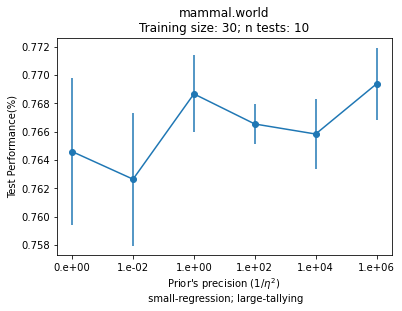

In [8]:
xp = list(range(len(penalties)))
yp = predictions[-1:None:-1,:]
plt.errorbar(xp, yp.mean(axis=1), 
             yerr=yp.std(axis=1)/np.sqrt(npart))
plt.scatter(xp, yp.mean(axis=1))
plt.title(dataused + "\nTraining size: " + str(training_samples) + '; n tests: ' + str(npart));
plt.xlabel('Prior\'s precision (1/$\eta^2$) \n small-regression; large-tallying')
plt.ylabel('Test Performance(%)')
ttic = []
for i, xt in enumerate(np.round(1/(penalties**2),4)[-1:None:-1]): ttic.append(np.format_float_scientific(xt))
plt.xticks(ticks = xp, labels = ttic);

Ahora tratemos de inferir $\eta$.

¿Que hacemos? ¿Cómo extendemos el modelo half-ridge?


In [9]:
idx_data = 13 #There are 20 data sets i.e. between 0 and 19
#Problematic sets (e.g in sampling; or in partitions that take too long): 1, 6, 8,10,14,19 ... predictions for 7 are off
training_samples = 50 #for some datasets more than 20 wont work 
trainset, testset, Predictors, labels_cues, dataused, cue_validities, cue_order, dataset_original = data_setup_parpart(idx_data, training_samples)
cue_order2 = np.argsort(-cue_validities)
x = trainset.loc[:,labels_cues].iloc[:,cue_order2] # assumption that cue directionalities are known in advance (Dawes, 1979)  
y = trainset['dependent']
criterion = dataset_original.columns[2] #theme of the question e.g. higher price house for data set "house.world"
y[y<0] = 0 #changes dummy coding (option B:0; option A:1)
dirweights = mf.sign(cue_validities[cue_order2]) # assumption that cue directionalities are known in advance (Dawes, 1979)  
col_pos = (dirweights > 0)*1
mixed_cues = any(col_pos==0) and any(col_pos==1)
with pm.Model() as Half_Ridge2:

    #Priors
    #eta
    eta_Ridge = pm.Uniform('eta', lower = 0.001, upper = 10)
    #Weights
    posNormal = pm.Bound(pm.Normal, lower=0.0)
    negNormal = pm.Bound(pm.Normal, upper=0.0)
    if mixed_cues:#some cues are positively and other negatively related to the criterion
        weight_pos = posNormal('weights_pos', mu=0, sigma=eta_Ridge, shape = (col_pos==1).sum())
        weight_neg = negNormal('weights_neg', mu=0, sigma=eta_Ridge, shape = (col_pos==0).sum())
        weights = pm.Deterministic('weights', tt.concatenate([weight_pos, weight_neg]))
    elif any(col_pos==1): #all cues are positively related to the criterion
        weight_pos = posNormal('weights_pos', mu=0, sigma=eta_Ridge, shape = (col_pos==1).sum())
        weights = pm.Deterministic('weights', weight_pos)
    elif any(col_pos==0): #all cues are negatively related to the criterion
        weight_neg = negNormal('weights_neg', mu=0, sigma=eta_Ridge, shape = (col_pos==0).sum())
        weights = pm.Deterministic('weights', weight_pos)
    print(weights.tag.test_value.shape)   
    

    #Likelihood
    mu = weights*x #rows stimulus, columns: cues, cells: cue*weight
    print(mu.tag.test_value.shape)
    theta = pm.Deterministic('theta', pm.math.sigmoid(tt.sum(mu, axis=1)))
    print(theta.tag.test_value.shape) 
    y_1 = pm.Bernoulli('y_1', p=theta, observed=y) 

    #Sampling 
    trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
    #ppc = pm.sample_posterior_predictive(trace, samples=5000)
    data = az.from_pymc3(trace=trace)

observed_choices = testset['dependent']
observed_cues = testset.loc[:,labels_cues].iloc[:,cue_order2]
mean_weights = trace['weights'].mean(axis=0)
y_hat = mean_weights*observed_cues  
z_i = y_hat.sum(axis=1)
p_i = 1/(1+np.exp(-z_i))
choice_i = np.where(p_i>0.5, 1, np.where(p_i<0.5,-1,0)) #if likelihood is bernoulli
#choice_i = np.where(z_i>0, 1, np.where(z_i<0,-1,0)) #if likelihood is normal
prediction_accuracy = (observed_choices==choice_i).mean()


(9,)
(50, 9)
(50,)


<ipython-input-9-55568cb93788>:42: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights_neg, weights_pos, eta]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 22 seconds.


Data set used:  mammal.world
Predictions correct:  0.778
Average eta:  0.8941


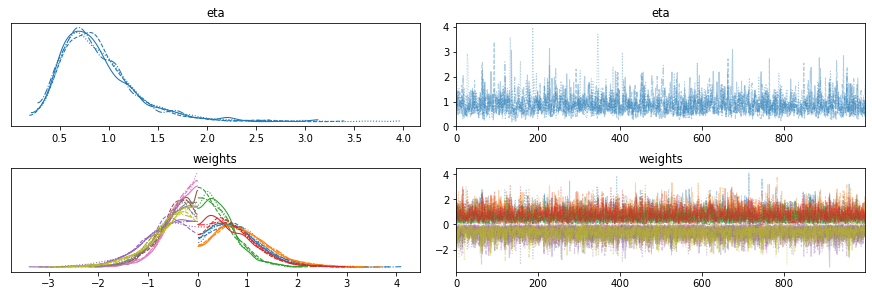

In [10]:
print("Data set used: ", dataused)
az.plot_trace(data, var_names=['eta', 'weights'], compact=True);
print('Predictions correct: ', np.round(prediction_accuracy,4))
print('Average eta: ', np.round(trace['eta'].mean(axis=0),4))

El parametro $\eta$ NO está alrededor de cero (tallying puro) o muy alejado (regresión pura). 

El efecto less-is-more existe $\left(\frac{1}{\eta^2}>0\right)$ pero no en su versión extrema $\left(\frac{1}{\eta^2}<\infty\right)$. Ver los pesos de la regresión, no están centrados en la misma posición como predice tallying puro.

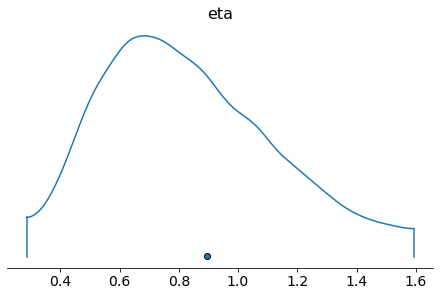

In [11]:
az.plot_density(data, var_names=['eta']);
plt.savefig('img/7_CB/eta_parpart.svg')

## Ejercicios

* Haga el diagrama del modelo half-ridge2

* En el modelo half-ridge2: 
    * Ponga el promedio de los priors en +1 para los positivos, y -1 para los negativos para emular unit weights para $\eta$ pequeños (i.e. un prior de tallying). Comente que observa diferente a cuando el prior de los weights está centrado en cero. 
        * Compare ambos (prior weights centrado en 0 vs +/-1) con criterios estadísticos (e.g. WAICC, o LOO). ¿Cuál es mejor según ese criterio?
    * Cambie el likelihood del modelo por uno normal en vez de Bernoulli ¿Cambia algo? ¿Si, no, por qué?
        * Compare el modelo Normal y Bernoulli con criterios estadísticos (e.g. WAICC, o LOO). ¿Cuál es mejor según ese criterio?


# Appendix

In [ ]:
#Take-the-best
dot_text = 'digraph G {rankdir=TB; compound=true; newrank=true; labelloc="t";\
           label="TTB";\
           /* general properties*/\
           node [margin=0, fixedsize=true, shape=plaintext,\
                 height=0.5, width=0.5, lblstyle="font=\\small"];\
           /* links */\
           s -> tq;\
           aq -> tq;\
           bq -> tq;\
           tq -> yiq;\
           gamma -> yiq;\
           subgraph cluster0 {\
               margin = 10; labeljust=l; lblstyle="font=\\small";\
               style = rounded;\
               label = "$q questions$";\
               tq;\
               aq;\
               bq;\
               subgraph cluster1 {\
                   margin = 10; labeljust=l; lblstyle="font=\\small";\
                   style = rounded;\
                   label = "$i subjects$";\
                   yiq;\
               }\
           }\
           /* nodes */\
           s [label = "$s$", fillcolor = gray, style = filled, shape = square];\
           aq [label = "$a_q$", fillcolor = gray, style = filled, shape = square];\
           bq [label = "$b_q$", fillcolor = gray, style = filled, shape = square];\
           tq [label = "$t_{q}$", shape = square, peripheries = 2];\
           yiq [label = "$y_{iq}$", fillcolor = gray, style = filled, shape = square];\
           gamma [label = "$gamma$", shape = circle];\
           }' #warning: use single quote at start and end; double quotes for labels
s = Source(dot_text, filename="img/7_CB/model_TTB.gv", format="svg") #THIS IS NOT THE FINAL ONE
s.view()

#distributions:
# t_q = TTB_s(a_q, b_q)
# \gamma \sim Uniform(0.5,1)
# $$ y_{iq} \sim
#\begin{cases}
#\text{Bernoulli}(\gamma) & \text{if $t_q = a$} \\
#\text{Bernoulli}(1- \gamma) & \text{if $t_q = b$} \\
#\text{Bernoulli}(0.5) & \text{otherwise}
#\end{cases}  $$

#To typeset latex stuff on the image: 
#1) open svg in inkscape and write latex formulas. Export as pdf (click the one that says latex)
#   to change fontsize of latex in inkscape write before the expression: 
#        \fontsize{34pt}{1em} $latex expression$ ... change #pt for size
#2) go to overleaf or latex editor of choice and do this (https://castel.dev/post/lecture-notes-2/):
#   2.1) In the preamble:
#  \usepackage{import}
#  \usepackage{xifthen}
#  \usepackage{pdfpages}
#  \usepackage{transparent}
#  \usepackage{graphics} 

#  \newcommand{\incfig}[1]{%
#      \def\svgwidth{\columnwidth}
#      \import{./figures/}{#1.pdf_tex} %PUT the inkscape .pdf_tex AND .pdf in a local folder called figures
#  }
#   2.2)In the body:
#  \begin{figure}[ht]
#      \centering
#      \scalebox{.65}{\incfig{your_inkscape.pdf_tex}} #change scalebox proportion to rescale
#      \caption{Riemmans theorem}
#      \label{fig:riemmans-theorem}
#  \end{figure}

In [ ]:
#Latent-mixture model: Take-the-best + WADD
dot_text = 'digraph G {rankdir=TB; compound=true; newrank=true; labelloc="t";\
           label="TTB+WADD";\
           /* general properties*/\
           node [margin=0, fixedsize=true, shape=plaintext,\
                 height=0.5, width=0.5, lblstyle="font=\\small"];\
           /* links */\
           phi -> z;\
           z -> tq;\
           s -> tq;\
           aq -> tq;\
           bq -> tq;\
           tq -> yiq;\
           gamma -> yiq;\
           subgraph cluster0 {\
               margin = 10; labeljust=l; lblstyle="font=\\small";\
               style = rounded;\
               label = "$q questions$";\
               tq;\
               aq;\
               bq;\
               subgraph cluster1 {\
                   margin = 10; labeljust=l; lblstyle="font=\\small";\
                   style = rounded;\
                   label = "$i subjects$";\
                   yiq;\
                   tq;\
                   z;\
               }\
           }\
           /* nodes */\
           s [label = "$s$", fillcolor = gray, style = filled, shape = square];\
           aq [label = "$a_q$", fillcolor = gray, style = filled, shape = square];\
           bq [label = "$b_q$", fillcolor = gray, style = filled, shape = square];\
           tq [label = "$t_{iq}$", shape = square, peripheries = 2];\
           yiq [label = "$y_{iq}$", fillcolor = gray, style = filled, shape = square];\
           gamma [label = "$gamma$", shape = circle];\
           phi [label = "$phi$", shape = circle];\
           z [label = "$z_i$", shape = square];\
           }' #warning: use single quote at start and end; double quotes for labels
s = Source(dot_text, filename="img/7_CB/model_TTB_WADD.gv", format="svg") #THIS IS NOT THE FINAL ONE
s.view()

#distributions:
# \phi \sim Uniform(0,1)
# \z_i \sim Bernoulli(\phi)
# \gamma \sim Uniform(0.5,1)
#$$ t_{iq} = 
#\begin{cases}
#\text{TTB}\,(\mathbf a_q,\mathbf b_q) & \text{if $z_i = 1$} \\
#\text{WADD}\,(\mathbf a_q,\mathbf b_q) & \text{if $z_i = 0$} \\
#\end{cases}  $$  
# $$ y_{iq} \sim
#\begin{cases}
#\text{Bernoulli}(\gamma) & \text{if $t_{iq} = a$} \\
#\text{Bernoulli}(1- \gamma) & \text{if $t_{iq} = b$} \\
#\text{Bernoulli}(0.5) & \text{otherwise}
#\end{cases}  $$

In [ ]:
#Take-the-best different orders
dot_text = 'digraph G {rankdir=TB; compound=true; newrank=true; labelloc="t";\
           label="TTB+Order";\
           /* general properties*/\
           node [margin=0, fixedsize=true, shape=plaintext,\
                 height=0.5, width=0.5, lblstyle="font=\\small"];\
           /* links */\
           v -> s;\
           s -> tq;\
           aq -> tq;\
           bq -> tq;\
           tq -> yiq;\
           gamma -> yiq;\
           subgraph cluster0 {\
               margin = 10; labeljust=l; lblstyle="font=\\small";\
               style = rounded;\
               label = "$q \\\ questions$";\
               tq;\
               aq;\
               bq;\
               subgraph cluster1 {\
                   margin = 10; labeljust=l; lblstyle="font=\\small";\
                   style = rounded;\
                   label = "$i \\\ subj$";\
                   yiq;\
                   tq;\
                   s;\
                   subgraph cluster2{\
                       margin = 10; labeljust=l; lblstyle="font=\\small";\
                       style = rounded;\
                       label = "$c \\\ cue$";\
                       v;\
                   }\
               }\
           }\
           /* nodes */\
           v [label = "$v_{ic}$", shape = circle];\
           s [label = "$s_i$", peripheries = 2, shape = square];\
           aq [label = "$a_q$", fillcolor = gray, style = filled, shape = square];\
           bq [label = "$b_q$", fillcolor = gray, style = filled, shape = square];\
           tq [label = "$t_{iq}$", shape = square, peripheries = 2];\
           yiq [label = "$y_{iq}$", fillcolor = gray, style = filled, shape = square];\
           gamma [label = "$\\\gamma$", shape = circle];\
           }' #warning: use single quote at start and end; double quotes for labels
s = Source(dot_text, filename="img/7_CB/model_TTB_order.gv", format="svg") #THIS IS NOT THE FINAL ONE
s.view()



In [ ]:
#Parpart et al, 2018 COR model

def data_setup_parpart(idx_data, training_samples):
    #idx_data: scalar, data index in ALL_DATA
    #percent_training: scalar between 0-1, percentage of all data used for training
    
    
    #idx_data = 0 #data index in ALL_DATA
    ALL_DATA = ["house.world","mortality","cit.world","prf.world","bodyfat.world", "car.world","cloud",
            "dropout","fat.world", "fuel.world", "glps",
            "homeless.world", "landrent.world", "mammal.world", "oxidants",
            "attractiveness.men", "attractiveness.women", "fish.fertility","oxygen", "ozone"]

    y_pos = 2 #column position of dependent variable (criterion) i.e. correct answer to question is based on this 
    #in dataset, 0 below median, 1 above median. 
    #Gigerenzer et al, converted continuous variables to median splits 
    dataset = pd.read_table("data/7_CB/Parpart 2018/Data/" + ALL_DATA[idx_data] + ".txt")
    idx = list(range(4,dataset.shape[1])) #make sure all cues start at column 4
    col_cues = np.array(idx) #idx of columns with cues
    labels_cues = dataset.columns[idx]
    Predictors = len(labels_cues) #number of cues
    N = dataset.shape[0] # number of objects e.g cities
    #k = 100 #number of partitions for cross validations

    #Create Paired Data (ALL binary comparisons of objects e.g. cities)
    comb = np.array(list(combinations(list(range(N)), 2)))
    idx = np.stack([np.random.choice([0,1], 2, replace = False) for rep in range(comb.shape[0])]) #[0,1] shuffled many times
    comb = np.transpose(np.stack([comb[i,ele] for i,ele in enumerate(idx)])) #columns shuffled
    y = np.repeat(np.nan, comb.shape[1]) # correct classification; A(+1) or B(-1)  
    difference = np.repeat(np.nan, comb.shape[1]) 
    bdata_diff = pd.DataFrame(np.nan, index=np.arange(comb.shape[1]), columns=labels_cues)
    for i in range(comb.shape[1]):
        # takes out only the 2 rows from dataset that are compared at step i 
        binary = dataset.loc[comb[:,i],:].reset_index(drop=True) #2 random rows
        if i == 0:
            comparisons = binary
        else:
            comparisons = pd.concat([comparisons, binary])

        ## always compare row 1 with row 2 (no matter which ones has the higher criterion value) upper row - lower row
        if binary.iloc[0,y_pos] > binary.iloc[1,y_pos]:
            y[i] = 1 #(A)
        else:
            y[i] = - 1 #(B)

        ## cue values (row 1) - cue values (row 2) 
        bdata_diff.loc[i,:] = binary.loc[0,labels_cues] - binary.loc[1,labels_cues] # 

    bdata_diff['dependent'] = y
    paired_data = copy.deepcopy(bdata_diff)
    dataset = copy.deepcopy(paired_data)
    
    # Assess paired_data cue validities and order as v= R/R+W  ------R:right, W:wrong
    cue_validities_raw = np.repeat(np.nan, Predictors)
    cue_validities = np.repeat(np.nan, Predictors) #between 0 (does not predict which is better) and 1 (always predicts which is better)
    for c in range(Predictors):
        condition = (paired_data.iloc[:,c]==paired_data.loc[:,'dependent']).sum() == 0
        if condition: # stays 0 now if it was 0 
            cue_validities[c] = 0
        else:
            cue_validities_raw[c] = (paired_data.iloc[:,c]==paired_data.loc[:, 'dependent']).sum()/((paired_data.iloc[:,c]==1).sum()+(paired_data.iloc[:,c]==-1).sum()) 
            cue_validities[c] = cue_validities_raw[c] - 0.5 #the 0.5 is to make a 0.5 validity 0. Parpart's code says that this brings back to same scale as regression weights as otherwise order can be different!
    cue_order = np.argsort(-abs(cue_validities)) 
    

    # number of objects (e.g. paired cities comparisons) after evening out
    N = dataset.shape[0]

    #Partitions for cross-validation
    percent_training = training_samples/N
    # Generate the cross-validation partitions: 
    percent =(1 - percent_training)  #### Hold the testset (distinct from random training set) 
    training_sample_size = percent_training*N
    #re = np.repeat(np.nan, k) # resampling
    #i = 0 #partition number (see k above) (looping var)
    trainset, testset = train_test_split(dataset, test_size=percent)
    trainset = trainset.reset_index(drop=True)
    testset = testset.reset_index(drop=True)
    #print([trainset.shape, testset.shape, dataset.shape, training_sample_size])
    Predictors = trainset.shape[1]-1
    #Re-shuffling zero variance cases (incompatible with COR model) 
    cov_mat = trainset[labels_cues].corr()
    # NA cases = zero variance cases, get resampled now until one is found without any zero variance cases
    max_while = 1000000
    mm = 0
    while cov_mat.isna().any(axis = None) and mm<=max_while:
        trainset, testset = train_test_split(dataset, test_size=percent)
        trainset = trainset.reset_index(drop=True) 
        testset = testset.reset_index(drop=True)
        cov_mat = trainset[labels_cues].corr()
        if mm == max_while:
            raise NameError('Reshuffling zero variance cases took too long')

    #Throwing out redundant predictors from x for both OLS and COR model fitting:      
    lower_triangle = pd.DataFrame(np.tril(cov_mat,-1), index = labels_cues, columns= labels_cues)    
    # == 1 has problems, so > .9999 grabs all the ones
    if (lower_triangle>0.99999999).any(axis=None): # if there is at least 1 complete redundancy (TRUE) in the lower triangle, 
        eliminate = np.transpose(np.where(np.array(cov_mat>0.99999999))) #1st col: row position, 2nd col: column position
        var_delete = np.repeat(np.nan, eliminate.shape[0])
        for f in range(eliminate.shape[0]):
            if eliminate[f,0] != eliminate[f,1]: # only take those that are not the matrix diagonal
                var_delete[f] = eliminate[f,0] # store the row number of that first variable  
        redundant = np.sort(pd.DataFrame(var_delete[var_delete > 0])[0].unique()).astype(int) # only take each variable once, in order, and only as many as necessary to get rid of redundancy
        m = redundant.shape[0] # how many redundancies there are overall
        # deleting m-1 of the redundant predictors still gets rid of all redundancies
        trainset = trainset.drop(list(labels_cues[redundant[0:(m-1)]]), axis = 1)
        testset = testset.drop(list(labels_cues[redundant[0:(m-1)]]), axis = 1)
        #paired_data = copy.deepcopy(dataset.drop(list(labels_cues[redundant[0:(m-1)]]), axis = 1))
        labels_cues = trainset.columns[0:-1]
        Predictors = trainset.shape[1] - 1 # - dependent
    #test = testset.drop(['dependent'],axis=1) 
    
    
    
    return trainset, testset, Predictors, labels_cues, ALL_DATA[idx_data], cue_validities, cue_order, pd.read_table("data/7_CB/Parpart 2018/Data/" + ALL_DATA[idx_data] + ".txt")


idx_data = 0 #There are 20 data sets i.e. between 0 and 19
training_samples = 10 #more than 10 to 15 will not run, the model is misspecified as explained by Parpart
trainset, testset, Predictors, labels_cues, dataused, cue_validities, cue_order, dataset_original = data_setup_parpart(idx_data, training_samples)
x = trainset.loc[:,labels_cues]  
y = trainset['dependent']
criterion = dataset_original.columns[2]
y[y<0] = 0 #changes dummy coding (option B:0; option A:1)
eta = 50.001 #Place holder, below I put this in a loop. Parpart calls them penalties in her R code
with pm.Model() as COR:
    #IMPORTANT NOTE: more than 10 to 15 samples in training will not run
    #The model is misspecified.
    
    #COR: Covariance Orthogonalizing Regularization (Paula Parpart's et al, 2018):
    # "the model architecture implements m regression problems at once, 
    # meaning the criterion variable y is regressed onto all cues m times (Fig. A1) ...
    # ...the COR model is misspecified ... is artificially multivariate despite 
    # the original prediction problem being univariate. Nevertheless, the COR model 
    # opens up new insights into the role of cue covariance in establishing a continuum 
    # between heuristics that rely on cue validity and full-information models"
    
    #Priors
    #Weights matrix: 
    # "an improper uniform prior on all W ii ( 1 ⩽ i ⩽ m ) and 
    # a prior of N (0, eta^2 ) for all W ij ( i ≠ j ). The joint 
    # distribution on W treats all weights as independent." (pp 143)
    # As eta goes to zero, off diagonal weights squeeze towards zero. 
    # This is a penalty for multiple cues because single cues (diagonal weights) 
    # become more important and the use of multiple cues becomes irrelevant
    
    eta_COR =  pm.Data("eta", eta)
    w_diag = pm.Uniform('weights_diag', shape = Predictors, lower=-100, upper=100) #predictors are the cues (1D shape: (Predictors,))
    #w_diag = pm.Uniform('weights_diag', shape = Predictors, lower=0, upper=100) #predictors are the cues (1D shape: (Predictors,))
    temp = tt.eye(Predictors)
    w_diag_reshape = w_diag*temp #(shape: Predictors X Predictors; diagonal: w_diag)
    w_offdiag = pm.Normal('weights_offdiag', mu = 0, sigma = eta_COR, 
                          shape = (Predictors,Predictors-1))
    left_zeros = tt.zeros((Predictors,1)) #to build a diagonal with zeros
    bottom_zeros = tt.zeros((1,Predictors))
    w_offdiag_reshape =  tt.concatenate([left_zeros, w_offdiag], axis = 1) 
    w_offdiag_reshape =  tt.concatenate([w_offdiag_reshape, bottom_zeros], axis = 0)
    temp = tt.reshape(w_offdiag_reshape, (1, (Predictors+1)*Predictors))
    w_offdiag_reshape = tt.reshape(temp[0, 0:-Predictors], (Predictors,Predictors)) #(shape: Predictors X Predictors; diagonal: zeros)
    w_matrix = pm.Deterministic("weights", w_diag_reshape + w_offdiag_reshape)
    #print(w_matrix.tag.test_value.shape) #prints shape of theano variable
    

    #Likelihood
    mu = pm.math.dot(x, w_matrix) #rows: observations; #columns: y_j; cell: weighted sum for observation i 
    theta = pm.Deterministic('theta', pm.math.sigmoid(mu))
    print(mu.tag.test_value.shape, theta.tag.test_value.shape)
    theta_mean = tt.mean(theta, axis = 0)
    print(theta_mean.tag.test_value.shape) 
    y_multiplexed = np.transpose(np.tile(y,(Predictors,1)))
    print(y_multiplexed.shape) 
    y_1 = pm.Bernoulli('y_1', p=theta, observed=y_multiplexed) 

    
    #Sampling
    #step = pm.Metropolis()
    #trace = pm.sample(1000, init = 'adapt_diag', tune = 1500, step = step)
    trace = pm.sample(1000, init = 'adapt_diag', tune=1500, target_accept = 0.95)
    #ppc = pm.sample_posterior_predictive(trace, samples=5000)
    data = az.from_pymc3(trace=trace)

print("Data set used: ", dataused)
print("Off-diagonal penalty used: ", eta)
az.plot_trace(data, var_names=['weights_diag', "weights_offdiag"], compact=True);

#TTB choice (Parpart et al, 2018, pp 132)
#eta -> 0 pure TTB i.e. only diagonal weights matter
#eta -> inf (or really large) linear regression
mean_weights = pd.DataFrame(trace['weights'].mean(axis=0), 
                            columns = labels_cues, index = labels_cues)
observed_choices = np.reshape(np.array(testset['dependent']), (1,testset.shape[0]))
observed_cues = testset.loc[:,labels_cues]
y_hat = np.dot(observed_cues, mean_weights) # rows choice, columns: summatory for set of weights
j_i_star = np.argmax(np.abs(y_hat),axis=1) #index with largest absolute y_hat
z_i = y_hat[range(y_hat.shape[0]),j_i_star]
TTB_choice_i = np.where(z_i>0, 1, np.where(z_i<0,-1,0))
prediction_accuracy = (observed_choices==TTB_choice_i).mean()
prediction_accuracy